In [37]:
require(ISLR2)
require(boot)

In [38]:
?cv.glm

cv.glm                  package:boot                   R Documentation

_C_r_o_s_s-_v_a_l_i_d_a_t_i_o_n _f_o_r _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function calculates the estimated K-fold cross-validation
     prediction error for generalized linear models.

_U_s_a_g_e:

     cv.glm(data, glmfit, cost, K)
     
_A_r_g_u_m_e_n_t_s:

    data: A matrix or data frame containing the data.  The rows should
          be cases and the columns correspond to variables, one of
          which is the response.

  glmfit: An object of class '"glm"' containing the results of a
          generalized linear model fitted to 'data'.

    cost: A function of two vector arguments specifying the cost
          function for the cross-validation.  The first argument to
          'cost' should correspond to the observed responses and the
          second argument should correspond to the predict

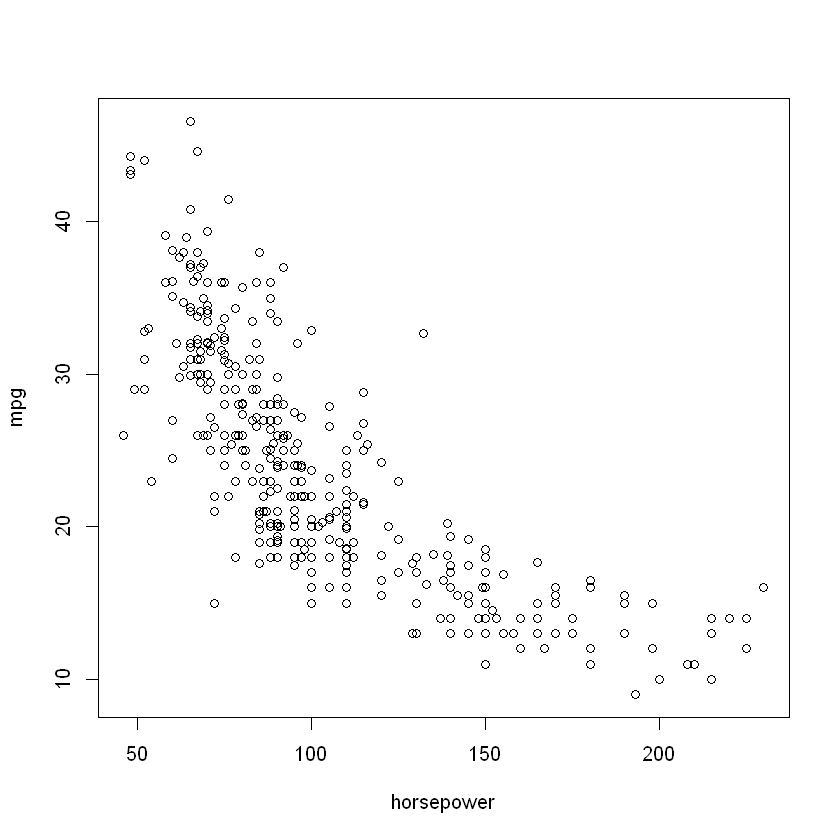

In [39]:
plot(mpg~horsepower,data=Auto)

In [40]:
# LOOCV
glm_fit=glm(mpg~horsepower,data=Auto) # uses brute force to calculate a model for each leave one out "n"


In [41]:
cv.glm(Auto,glm_fit)$delta

[1] 24.23151 24.23114

In [42]:
loocv=function(fit){
    h = influence(fit)$h
    mean((residuals(fit)/(1-h))^2)
}

In [43]:
loocv(glm_fit)

[1] 24.23151

In [44]:
cv_error = rep(0,5)
cv_error

[1] 0 0 0 0 0

In [45]:
degrees = 1:5
degrees

[1] 1 2 3 4 5

In [46]:
for(d in degrees){
    glm_fit_1 = glm(mpg~poly(horsepower,d),data=Auto)
    cv_error[d]=loocv(glm_fit_1)
}

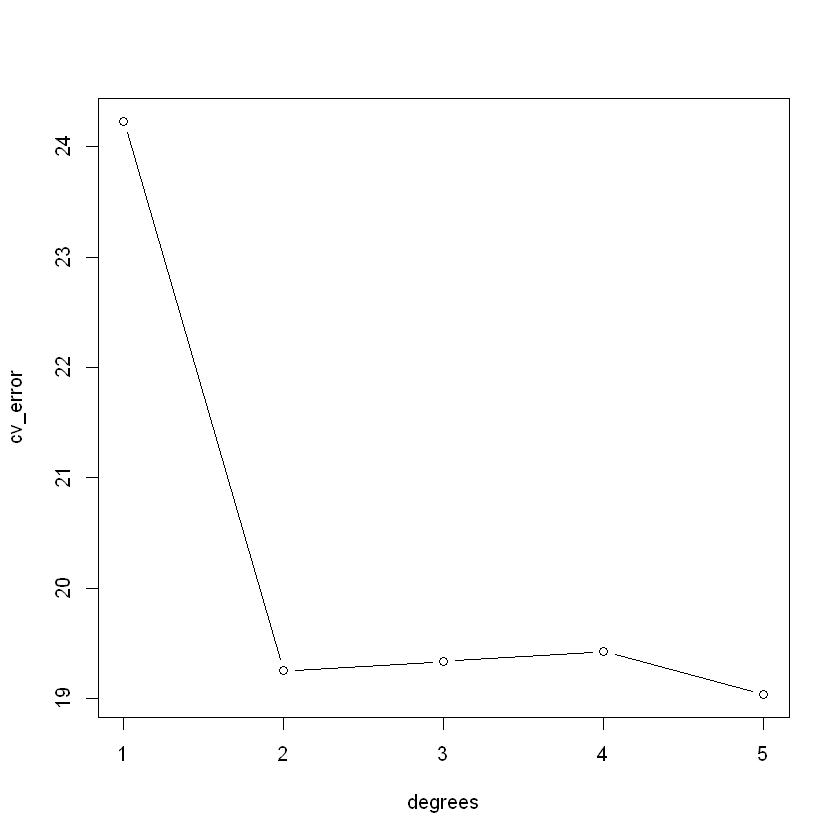

In [47]:
plot(degrees,cv_error,type="b")

In [48]:
# 10-fold cross-validaton
cv_error_10 = rep(0,5)

In [49]:
for(d in degrees){
    glm_fit_2 = glm(mpg~poly(horsepower,d),data=Auto)
    cv_error_10[d]= cv.glm(Auto,glm_fit_2,K=10)$delta[1]
}

In [50]:
cv_error_10

[1] 24.29986 19.38107 19.23278 19.36230 19.27697

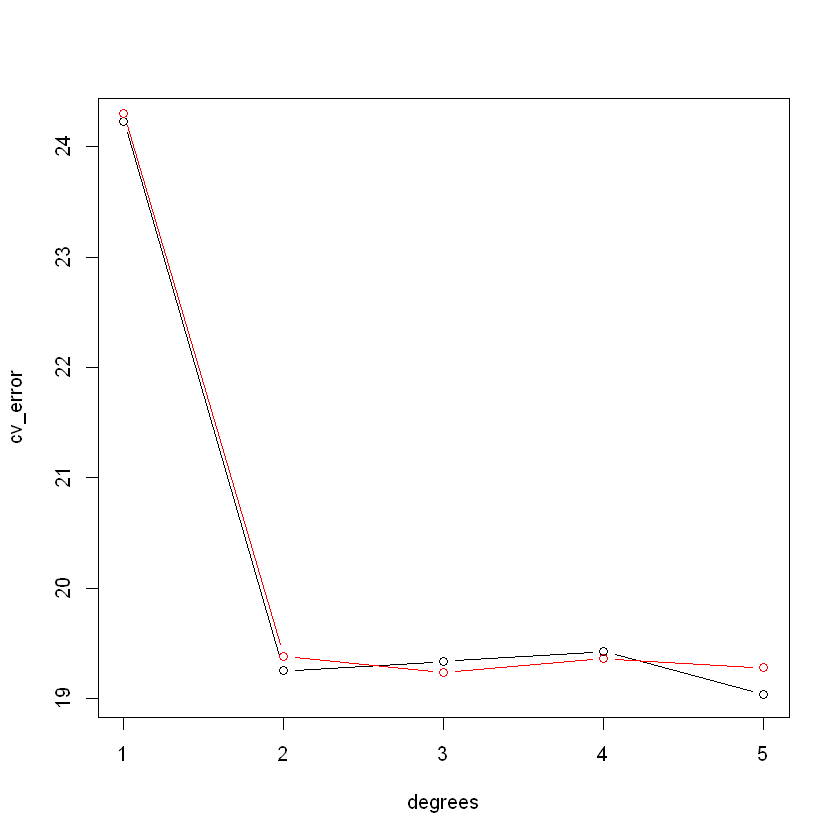

In [51]:
plot(degrees,cv_error,type="b")
lines(degrees,cv_error_10,type = "b",col = "red")